<a href="https://colab.research.google.com/github/Mohamed-derbeli/Application-of-ML-in-a-fuel-cell-system/blob/main/Modeling_of_a_Commercial_Heliocentris_PEMFC_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Project title:** Machine Learning Approach for Modeling and Control of a Commercial Heliocentris FC50 PEM Fuel Cell System

**Objective:** the goal of this project is to obtain an accurate PEMFC model that can perform with the same trend as the commercial Heliocentrics FC50 system. 



*   To cover the effect of all PEMFC parameters, and extensive database (data_size= 33856) for various operating conditions was used in the training operation.  
 
*   Extensive tests with various ANN parameters are performed to obtain the best fit in terms of prediction accuracy.



 A detailed discription of this project can be found in: https://www.mdpi.com/2227-7390/9/17/2068/htm

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import codecs
import io
import csv
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers
from google.colab import files
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# import urllib.request

In [2]:
# read data from github
# with urllib.request.urlopen('https://raw.githubusercontent.com/Mohamed-derbeli/Fuel-cell-system/main/FC50_All_data00.csv') as csvfile:
# read_file = csv.reader(codecs.iterdecode(csvfile, 'utf-8'), delimiter=',')

#read data from local machine    
uploaded = files.upload()  

data= io.BytesIO(uploaded['FC50_All_data00.csv'])
read_file = csv.reader(codecs.iterdecode(data, 'utf-8'), delimiter=',')  

Saving FC50_All_data00.csv to FC50_All_data00 (3).csv


In [3]:
#Inputs/ Fan: Fan power, Temp: Temperature, I_stack: Stack current, 
#Outputs/ V_stack: Stack voltage
V_stack=[]
I_stack=[]
Temp=[]
H_2=[]
Fan=[]
P_stack=[]
# The data of each parapmeter in the scv file is divided into 10 rows. Therefoe, to obtain the whole data of each stack parameters, the data should be appended in the same vector. 
V_stack_index=[]
I_stack_index=[]
Temp_index=[]
H_2_index=[]
Fan_index=[]
P_stack_index=[]


In [4]:
# next(read_file) # next() used to skip the first row 
for i in range(0,6): # 6 rows of each tables 
    for number in range(i, 60, 6): #total of all rows is 60
      if i==0:
        V_stack_index.append(number)
      if i==1:
        I_stack_index.append(number)
      if i==2:
        Temp_index.append(number)
      if i==3:
        H_2_index.append(number)
      if i==4:
        Fan_index.append(number)
      if i==5:
        P_stack_index.append(number)
            
#Plot indexes     
print("V_stack_index = ", V_stack_index)
print("I_stack_index = ",I_stack_index)
print("Temp_index = ",Temp_index)
print("H_2_index = ",H_2_index)
print("Fan_index = ",Fan_index)
print("P_stack_index = ",P_stack_index)

V_stack_index =  [0, 6, 12, 18, 24, 30, 36, 42, 48, 54]
I_stack_index =  [1, 7, 13, 19, 25, 31, 37, 43, 49, 55]
Temp_index =  [2, 8, 14, 20, 26, 32, 38, 44, 50, 56]
H_2_index =  [3, 9, 15, 21, 27, 33, 39, 45, 51, 57]
Fan_index =  [4, 10, 16, 22, 28, 34, 40, 46, 52, 58]
P_stack_index =  [5, 11, 17, 23, 29, 35, 41, 47, 53, 59]


In [5]:
counter=0    
for row in read_file:
  #clean the empty cells
  j=0
  for item in row:
    j=j+1
    if item =="":
      row=row[0:j-1]
  # print(j)
  #append the rows of the same parameter
  if counter in V_stack_index:
    for k1 in row: 
      V_stack.append(k1) 
      # this loop is used to fill in V_stack item by item and get 1 dimension vector,
      # if we directly append(row) without looping then the shape of V_stack will be 
      # 2 dimension (10 rows, each has differnet length), this will cause difficults 
      # to reshape V_stack since the rows length are not the same.        
  if counter in I_stack_index:
    for k2 in row:
      I_stack.append(k2)
  if counter in Temp_index:
    for k3 in row:
      Temp.append(k3)
  if counter in Fan_index:
    for k4 in row:
      Fan.append(k4)
  if counter in H_2_index:
    for k5 in row:
      H_2.append(k5)
  if counter in P_stack_index:
    for k6 in row:
      P_stack.append(k6)
  counter=counter+1

#plot the first 10 data of the stack parameters
print("\n V_stack = ",V_stack[0:10])
print("I_stack= ",I_stack[0:10])
print("Temp = ",Temp[0:10])
print("Fan = ", Fan[0:10])
print("H_2 = ", H_2[0:10])
print("P_stack = ", P_stack[0:10])


# print("\n dimentiones of V_stack are: ", [len(a) for a in V_stack])
# print("Total length of V_stack: ", sum(len(a) for a in V_stack))


 V_stack =  ['6.45', '6.09', '5.34', '4.41', '4.61', '5.52', '6.04', '6.52', '6.93', '7.16']
I_stack=  ['2.33', '2.97', '4.43', '6.58', '5.99', '4.17', '3.2', '2.34', '1.7', '1.34']
Temp =  ['25.6', '25.6', '25.5', '25.5', '25.5', '25.6', '25.6', '25.6', '25.7', '25.8']
Fan =  ['10', '10', '10', '10', '10', '10', '10', '10', '10', '10']
H_2 =  ['141', '165', '1036', '1036', '1036', '780', '1036', '1036', '648', '138']
P_stack =  ['15.0285', '18.0873', '23.6562', '29.0178', '27.6139', '23.0184', '19.328', '15.2568', '11.781', '9.5944']


The normalized data of V_stack are:  [0.645 0.609 0.534 0.441 0.461 0.552 0.604 0.652 0.693 0.716]


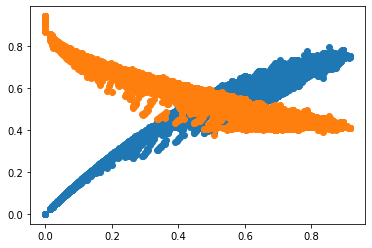

In [6]:
V_stack=np.array(V_stack, dtype=float)
I_stack=np.array(I_stack, dtype=float)
Temp=np.array(Temp, dtype=float)
Fan=np.array(Fan, dtype=float)
H_2=np.array(H_2, dtype=float)
P_stack=np.array(P_stack, dtype=float)

#Data normalization
V_stack=V_stack/10
I_stack=I_stack/10
Temp=Temp/50
Fan=Fan/100
H_2=H_2/1100
P_stack=P_stack/50

print("The normalized data of V_stack are: ", V_stack[0:10])


#Scatter plots are used to observe relationship between variables and uses dots to represent the relationship between them.

plt.scatter(I_stack, P_stack)
plt.scatter(I_stack, V_stack)

In [7]:
# Create training and test split
Total_size=len(V_stack)
Training_size= int(.8 * Total_size)
Testing_size= Total_size - Training_size

#training data
V_stack_train=V_stack[:Training_size]
I_stack_train=I_stack[:Training_size]
Temp_train=Temp[:Training_size]
Fan_train=Fan[:Training_size]
H_2_train=H_2[:Training_size]
P_stack_train=P_stack[:Training_size]

#testing data
V_stack_test=V_stack[Training_size:]
I_stack_test=I_stack[Training_size:]
Temp_test=Temp[Training_size:]
Fan_test=Fan[Training_size:]
H_2_test=H_2[Training_size:]
P_stack_test=P_stack[Training_size:]

print("Total_size= ", Total_size)
print("Training_size= ", Training_size)
print("Testing_size= ", Testing_size)

# Splitting data also can be done directly via sklearn 

# X=np.array([I_stack, Temp, Fan])
# X=X.T #transpose the rows
# Y=np.array(V_stack)
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=40)
# print(X_train.shape)
# print(X_test.shape)
# print(Y_train.shape)

Total_size=  33856
Training_size=  27084
Testing_size=  6772


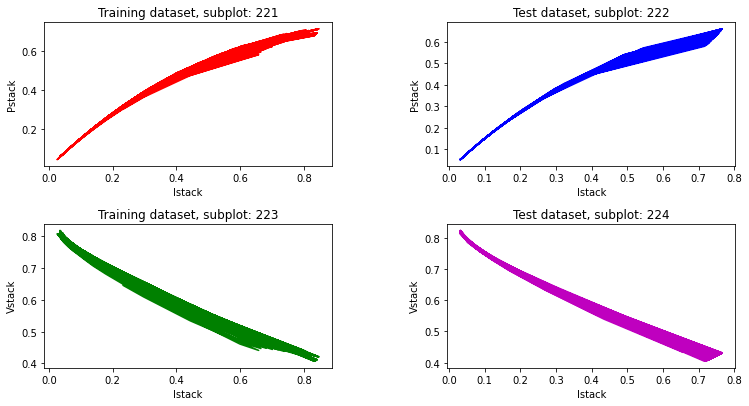

In [8]:
#Data visualization 
X=[I_stack_train[:2000], I_stack_test[0:1000], I_stack_train[:2000], I_stack_test[0:1000]]  # x-axis
Y=[P_stack_train[0:2000], P_stack_test[0:1000], V_stack_train[0:2000],V_stack_test[0:1000]] # Y-axis
k1=['r','b','g','m']                                                                         # color
k2=['Istack Vs Pstack','Istack Vs Pstack','Istack Vs Vstack','Istack Vs Vstack']             # label
title = ['Training dataset', 'Test dataset', 'Training dataset', 'Test dataset']             # figure titles
Xlab=['Istack','Istack','Istack','Istack']                                                   # name of x-axis
Ylab=['Pstack','Pstack','Vstack','Vstack']                                                   # name of y-axis

a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
itm=0

fig = plt.figure(figsize=(12,6))

# The following adjustment is needed to make space between the figures
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
for i in title:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(Xlab[itm])
    plt.ylabel(Ylab[itm])
    plt.plot(X[itm], Y[itm],k1[itm],label=k2[itm])
    c = c + 1
    itm= itm + 1

plt.show()


# OR
# fig, ax = plt.subplots(2, 2)
# ax[0, 0].plot(I_stack_train[:2000], P_stack_train[0:2000], 'r', label='Istack Vs Pstack') #row=0, col=0
# ax[1, 0].plot(I_stack_train[0:2000], V_stack_train[0:2000], 'b', label='Istack Vs Vstack') #row=1, col=0
# ax[0, 1].plot(I_stack_test[:1000], P_stack_test[0:1000], 'g', label='Istack Vs Pstack') #row=0, col=1
# ax[1, 1].plot(I_stack_test[0:1000], V_stack_test[0:1000], 'm', label='Istack Vs Vstack') #row=1, col=1
# ax[0, 0].set_title('Training dataset')
# ax[1, 0].set_title('Training dataset')
# ax[0, 1].set_title('Test dataset')
# ax[1, 1].set_title('Test Plot')
# ax[0, 0].set_xlabel('Istack')
# ax[1, 0].set_xlabel('Istack')
# ax[0, 1].set_xlabel('Istack')
# ax[1, 1].set_xlabel('Istack')
# ax[0, 0].set_ylabel('Pstack')
# ax[1, 0].set_ylabel('Vstack')
# ax[0, 1].set_ylabel('Pstack')
# ax[1, 1].set_ylabel('Vstack')
# fig.tight_layout()
# plt.show()

In [9]:
# Shuffle dataset: 
#only training data should be shuffled since the test and validataion data has no effect on the model
#shuffle helps the training to converge fast. it prevents any bias during the training. it prevents the model from learning the order of the training.
I_stack_train, V_stack_train, P_stack_train, Temp_train, Fan_train, H_2_train = shuffle(I_stack_train, V_stack_train, P_stack_train, Temp_train, Fan_train, H_2_train)

In [10]:
#  Set the input and output shape:
# Since H_2 is controlled automatically and P_stack is a result of V*I, then, only the other 4 parameters will be used to train the model.

Input_train= np.array([I_stack_train, Temp_train, Fan_train])
Input_train=Input_train.T #Transpose (reshape also can be used) 
Output_train=np.array(V_stack_train) 

Input_test= np.array([I_stack_test, Temp_test, Fan_test])
Input_test=Input_test.T 
Output_test=np.array(V_stack_test) 

print(Input_train.shape)
print(Output_train.shape)

print(Input_test.shape)
print(Output_test.shape)

(27084, 3)
(27084,)
(6772, 3)
(6772,)


In [11]:
desired_loss = 0.001

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < desired_loss):
      print("\nReached high accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [12]:
def plot_graphs(history, string, color1, color2):
  plt.plot(history.history[string], color1)
  plt.plot(history.history['val_'+string], color2)
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])

Epoch 1/10
6771/6771 - 8s - loss: 0.0290 - mse: 0.0062 - val_loss: 0.0262 - val_mse: 0.0013
Epoch 2/10
6771/6771 - 7s - loss: 0.0118 - mse: 2.6765e-04 - val_loss: 0.0218 - val_mse: 9.9383e-04
Epoch 3/10
6771/6771 - 7s - loss: 0.0102 - mse: 2.1177e-04 - val_loss: 0.0263 - val_mse: 0.0012
Epoch 4/10
6771/6771 - 7s - loss: 0.0099 - mse: 2.0264e-04 - val_loss: 0.0223 - val_mse: 0.0010
Epoch 5/10
6771/6771 - 7s - loss: 0.0095 - mse: 1.9004e-04 - val_loss: 0.0219 - val_mse: 9.8936e-04
Epoch 6/10
6771/6771 - 7s - loss: 0.0094 - mse: 1.8536e-04 - val_loss: 0.0217 - val_mse: 9.9276e-04
Epoch 7/10
6771/6771 - 7s - loss: 0.0092 - mse: 1.8044e-04 - val_loss: 0.0226 - val_mse: 9.6421e-04
Epoch 8/10
6771/6771 - 7s - loss: 0.0090 - mse: 1.7479e-04 - val_loss: 0.0227 - val_mse: 0.0010
Epoch 9/10
6771/6771 - 7s - loss: 0.0088 - mse: 1.6966e-04 - val_loss: 0.0245 - val_mse: 0.0012
Epoch 10/10
6771/6771 - 7s - loss: 0.0087 - mse: 1.6597e-04 - val_loss: 0.0211 - val_mse: 9.7477e-04
Epoch 1/10
847/847 - 2s

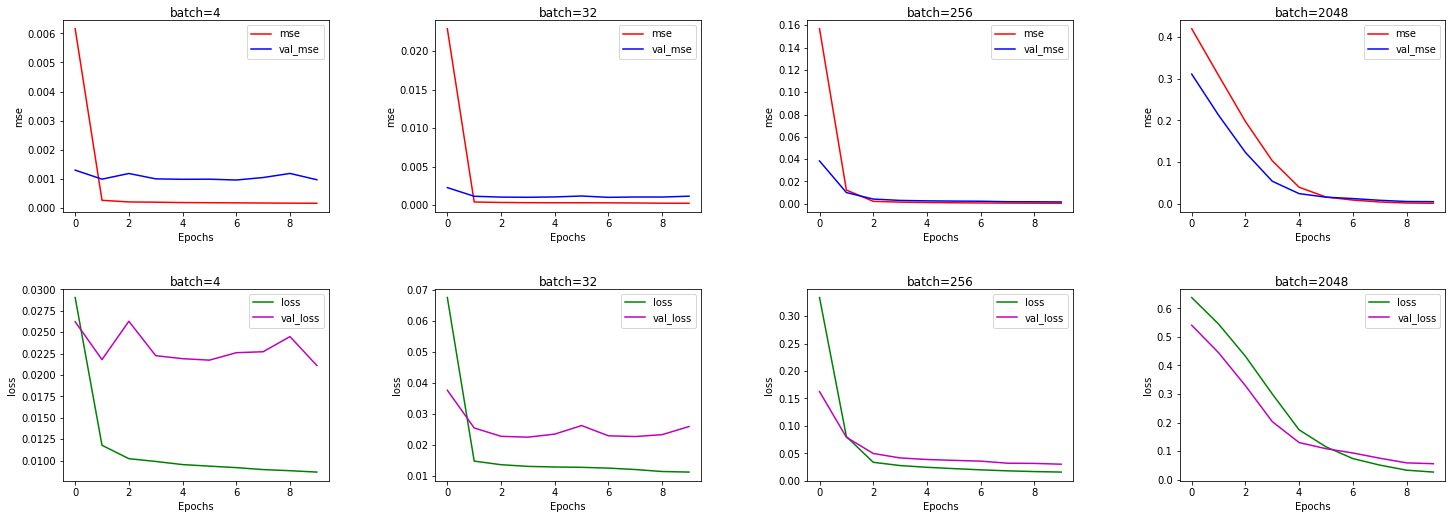

In [20]:
plt.figure(figsize=(24,8))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)


batch_sizes = [4, 32, 256, 2048]

for i in range(len(batch_sizes)):
  # define model
  model = models.Sequential()
  model.add(layers.Dense(10, activation="relu", input_shape=(3,))) #The first hidden layer would need to have input_shape set to the value matching the number of features. 
  model.add(layers.Dense(10, activation="relu"))
  model.add(layers.Dense(10, activation="relu"))
  model.add(layers.Dense(1, activation="linear")) # for regression problem, the last layer would only require 1 node and a "linear activation function" or "no activation function". 
  # Compile model
  model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                  loss='mae',     # The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
                  metrics=['mse']) # A metric is a function that is used to judge the performance of your model . 
  # fit model
  history = model.fit(Input_train, Output_train,
                      validation_data=(Input_test, Output_test),
                      epochs=10,
                      batch_size=batch_sizes[i], #default 32
                      verbose=2, # verbose=0 will show you nothing/ verbose=1 will show you an animated progress for each epoch/ verbose=2 will just mention the number of epoch 
                      callbacks=[callbacks])  
  # metrics visualization       
  plot_no = 240 + (i+1)
  plot_no1 = 240 + (i+5)
  plt.subplot(plot_no)
  plot_graphs(history, "mse", 'r', 'b') 
  plt.title('batch='+str(batch_sizes[i]), pad=-40)
  plt.subplot(plot_no1)
  plot_graphs(history, "loss", 'g', 'm')       
  plt.title('batch='+str(batch_sizes[i]), pad=-40)

plt.show()





# Keras Regression Metrics: mse, mae, mape (Mean Absolute Percentage Error), cosine, 
# Keras Classification Metrics: acc, sparse_categorical_accuracy, top_k_categorical_accuracy,sparse_top_k_categorical_accuracy

# Epochs Vs Iterations Vs baches
# Epochs: the number of epochs is the number of complete passes through the training dataset.
# Iterations: is the number of batches needed to complete one epoch. We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.
# batch_size: refers to the number of training examples utilized in one iteration.
# Note: The number of batches is equal to number of iterations for one epoch.	

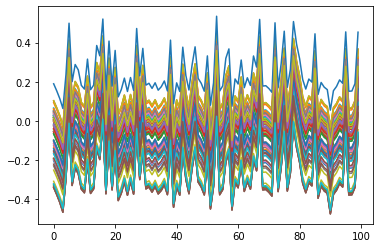

In [21]:
# make predictions using the predicted model
pred_output = model.predict(Input_train)
error= Output_train[:100]- pred_output[:100]
plt.plot(error)


In [15]:
# with urllib.request.urlopen('https://raw.githubusercontent.com/Mohamed-derbeli/Fuel-cell-system/main/FC50_All_data00.csv') as csvfile:
#    read_data = csvfile.read().decode('utf-8')
#    print(read_data[0:50])

#Total_size= sum(len(a) for a in V_stack)# for n dimension
# V_stack=np.reshape(V_stack,[1,10])